In [ ]:
from google.colab import drive

In [ ]:
# Mounting your drive. This allows us to store and load files from the mounted drive as if they were stored locally on the computer.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# changing directory to the google drive
import os
drive_path = os.path.join(os.getcwd(), "gdrive/MyDrive")
%cd {drive_path}

/content/gdrive/MyDrive


In [ ]:
#Assigning path of the home directory to HOME for easy file handling
HOME = os.path.join(drive_path, "yolov2_tiny_custom_3")
HOME

'/content/gdrive/MyDrive/yolov2_tiny_custom_3'

In [ ]:
%cd {HOME}

/content/gdrive/MyDrive/yolov2_tiny_custom_3


In [ ]:
!ls

backup	cfg  custom.names  darknet  detector.data  images  process.py  pt-weights


To divide all image files into 2 parts. 80% for train and 20% for test, Upload the process.py in yolov2_tiny_custom_3 directory

This process.py script creates the files train.txt & test.txt where the train.txt file has paths to 80% of the images and test.txt has paths to 20% of the images.

Open process.py specify the paths and then run it.

In [ ]:
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created
!ls

backup	custom.names  detector.data  process.py  test.txt
cfg	darknet       images	     pt-weights  train.txt


In [ ]:
%cd {HOME}
!git clone https://github.com/AlexeyAB/darknet

/content/gdrive/MyDrive/yolov2_tiny_custom_3
Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Total 15851 (delta 0), reused 0 (delta 0), pack-reused 15851
Receiving objects: 100% (15851/15851), 14.37 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (10683/10683), done.
Updating files: 100% (2056/2056), done.


In [ ]:
%cd darknet

/content/gdrive/MyDrive/yolov2_tiny_custom_3/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# compiling the model
!make

chmod +x *.sh


In [ ]:
%cd {HOME}/darknet

/content/gdrive/MyDrive/yolov2_tiny_custom_3/darknet


In [ ]:
%cd {HOME}

/content/gdrive/MyDrive/yolov2_tiny_custom_3


In [ ]:
!ls

backup	custom.names  detector.data  process.py  test.txt
cfg	darknet       images	     pt-weights  train.txt


In [ ]:
!./darknet detector train {HOME}/detector.data {HOME}/cfg/yolov2-tiny_custom.cfg {HOME}/pt-weights/yolov2-tiny.conv.13 -dont_show

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Region Avg IOU: 0.771769, Class: 0.999846, Obj: 0.966677, No Obj: 0.006394, Avg Recall: 0.928571,  count: 14
Region Avg IOU: 0.855387, Class: 0.999969, Obj: 0.991583, No Obj: 0.005365, Avg Recall: 1.000000,  count: 10
Region Avg IOU: 0.660732, Class: 0.999990, Obj: 0.996240, No Obj: 0.004936, Avg Recall: 0.692308,  count: 13

 Tensor Cores are used.
3768/4000: loss=0.1 hours left=0.0
 3768: 0.056051, 0.069448 avg loss, 0.000010 rate, 0.212830 seconds, 241152 images, 0.031740 hours left
Loaded: 0.152369 seconds - performance bottleneck on CPU or Disk HDD/SSD
Region Avg IOU: 0.798152, Class: 0.999627, Obj: 0.974148, No Obj: 0.008078, Avg Recall: 1.000000,  count: 9
Region Avg IOU: 0.822534, Class: 0.999918, Obj: 0.969315, No Obj: 0.007892, Avg Recall: 1.000000,  count: 14
Region Avg IOU: 0.757373, Class: 0.999765, Obj: 0.967555, No Obj: 0.007885, Avg Recall: 0.904762,  count: 21
Region Avg IOU: 0.854820, Class

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!./darknet detector test {HOME}/detector.data {HOME}/cfg/yolov2-tiny_custom.cfg {HOME}/backup/yolov2-tiny_custom_3000.weights {HOME}/image_426.jpg -thresh 0.5

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26

/content/gdrive/MyDrive/yolov2_tiny_custom_3/darknet


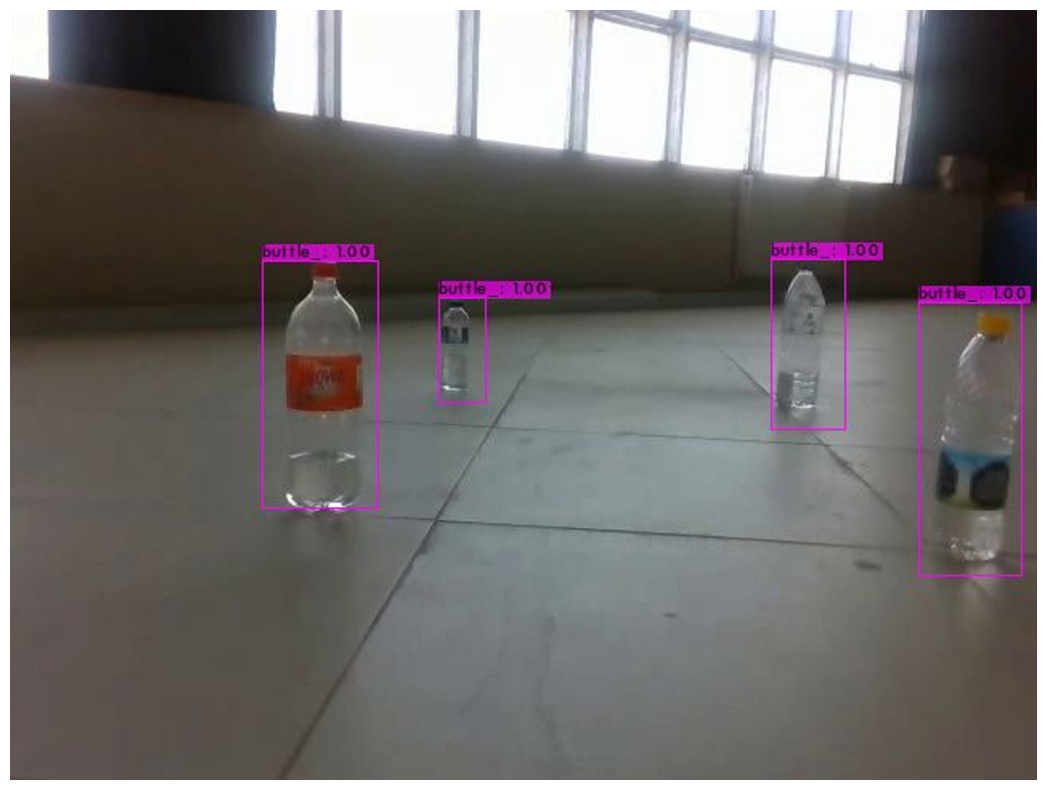

In [ ]:
%cd {HOME}/darknet
imShow('predictions.jpg')